# Ein Beispiel in Polarkoordinaten

\begin{align}
\dot r &= r(1-r) \\
\dot \theta &= \sin(\frac{\theta}{2})^2 = \frac{1-\cos(\theta)}{2}
\end{align}

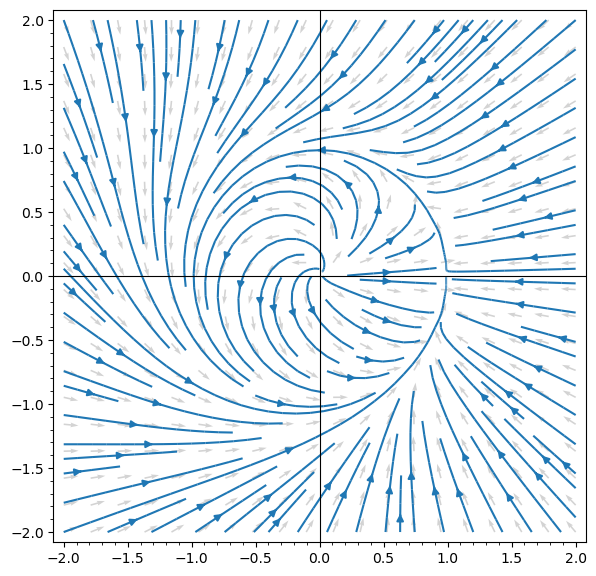

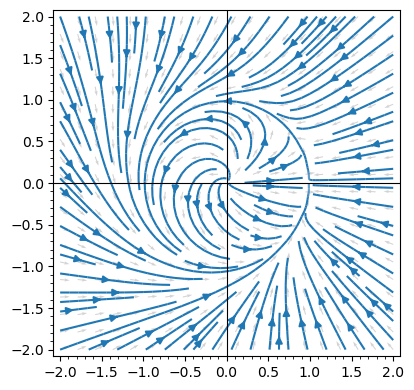

In [67]:
r = sqrt(x^2+y^2)
M = -y*(1-x/r)/2+x*(1-r)
N = x*(1-x/r)/2+y*(1-r)

a,b=-2,2
P=plot_vector_field(vector([M,N]).normalized(),(x,a,b),(y,a,b),color=colors.lightgray.rgb())+streamline_plot([M,N],(x,a,b),(y,a,b),density=1.2)
P.set_aspect_ratio(1)
P.show(figsize=(6,6))
P.save("attractive-phase-portrai.pdf")
P

In [63]:
var("r,t,th")

(r, t, th)

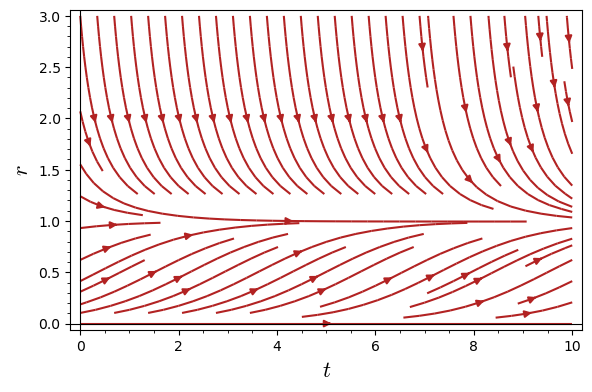

In [64]:
P = streamline_plot([1,r*(1-r)],(t,0,10),(r,0,3),color=colors.firebrick.rgb())
P.axes_labels(["$t$","$r$"])
P.save("attractive-r-plot.pdf")
P

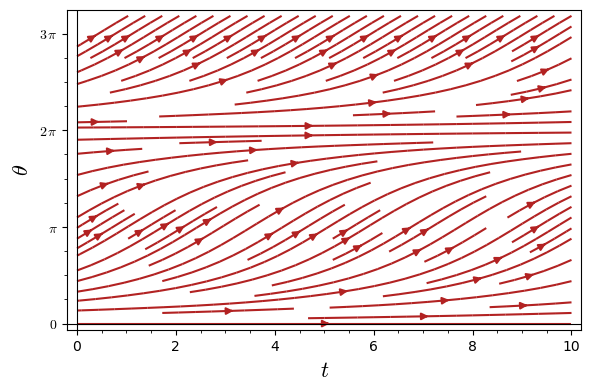

In [65]:
P=streamline_plot((1,(1-cos(th))/2),(t,0,10),(th,0,10),ticks=[None,pi],tick_formatter=[None,pi],color=colors.firebrick.rgb())
P.axes_labels(["$t$","$\\theta$"])
P.save("attractive-theta-plot.pdf")
P

# Vinograds Beispiel

Ein Beispiel für ein global attraktive aber nicht stabiles System

In [1]:
var("x,y")

(x, y)

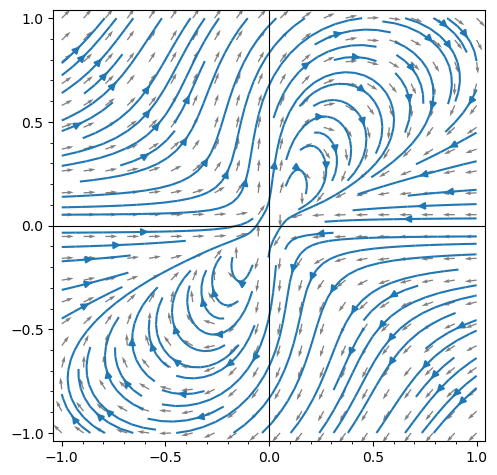

In [314]:
M = (x^2*(y-x)+y^5)/((x^2+y^2)*(1+(x^2+y^2)^4))
N = (y^2*(y-2*x))/((x^2+y^2)*(1+(x^2+y^2)^4))

a,b=-1,1
P=plot_vector_field(vector([M,N]).normalized(),(x,a,b),(y,a,b),color=colors.gray.rgb())+streamline_plot([M,N],(x,a,b),(y,a,b),density=1)
P.set_aspect_ratio(1)
P.show(figsize=(5,5))
P.save("vinograd.pdf",figsize=(10,10))

Leider treten hier unschöne numerische Fehler nahe der Null auf, deshalb plotten wir das ganze mit einem besseren Integrationsverfahren nocheinmal anders

# Achtung der folgende Code ist nicht zur Nachahmung empfohlen

In [95]:
var("x,y,t")

(x, y, t)

In [301]:
counter = 0
cm = colormaps.Oranges
num = 10
sign = 1
def plot_solution(VektorFeld,x_0,y_0,t_1,color=colors.green):
    NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=(0,x_0,y_0), ivar=t, end_points=t_1,step=0.1)
    ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=color) 
    return ParPlot
def plot_trajectory(x_0,y_0,past,future):
    global counter
    global cm
    global num
    global sign
    print((3*num+counter)/(4*num))
    color = cm(float((2*num+2*counter)/(4*num)))[0:3]
    counter = counter+1;
    return plot_solution((M,N),sign*x_0,sign*y_0,future,color=color)+plot_solution((-M,-N),sign*x_0,sign*y_0,past,color=color)

3/4
43/56
11/14
45/56
23/28
47/56
6/7
7/8
25/28
51/56
13/14
53/56
27/28
55/56
3/4
11/14
23/28
6/7
25/28
13/14
27/28
3/4
11/14
23/28
6/7
25/28
13/14
27/28
7/8
25/28
51/56
13/14
53/56
27/28
55/56
1
57/56
29/28
59/56
15/14
61/56
31/28
3/4
11/14
23/28
6/7
25/28
13/14
27/28
3/4
11/14
23/28
6/7
25/28
13/14
27/28


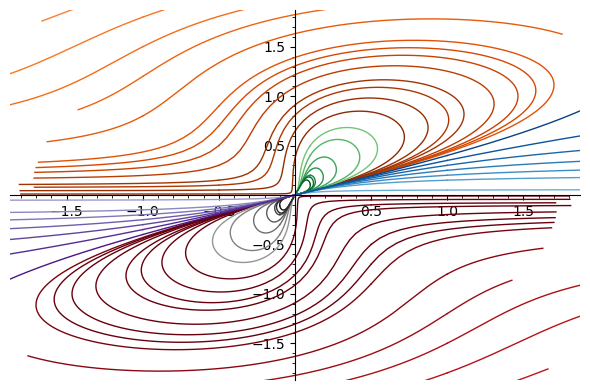

In [339]:
counter=0
cm=colormaps.Oranges
num=14
p=num*[0]
sign=1
p[ 11] =plot_trajectory(-1,    2.4,  past=110,future=200)
p[ 12] =plot_trajectory(-1,    2.1,  past=110,future=200)
p[ 13] =plot_trajectory(-1,    1.8,  past=110,future=200)
p[ 8] =plot_trajectory(-1,    1.5,  past=110,future=200)
p[ 9] =plot_trajectory(-1,    1.2,  past=10,future=200)
p[ 10] =plot_trajectory(-1,    0.8,  past=10,future=200)
p[ 0] =plot_trajectory(-0.5,    0.9,  past=10,future=400)
p[ 1] =plot_trajectory(-0.5,    0.7,  past=10,future=300)
p[ 2] =plot_trajectory(-0.5,    0.5,  past=10,future=400)
p[ 3] =plot_trajectory(-0.5,    0.3,  past=10,future=200)
p[ 4] =plot_trajectory(-0.5,    0.1,  past=10,future= 30)
p[ 5] =plot_trajectory(-0.5,   0.15,  past=15,future=200)
p[ 6] =plot_trajectory(-0.5,   0.05,  past=15,future= 15)
p[ 7] =plot_trajectory(-0.5,   0.01,  past=15,future= 15)
counter=0
cm=colormaps.Greens
num=7
p1=num*[0]
p1[ 1]=plot_trajectory(  0.1,    0.5,  past=10,future= 30)
p1[ 2]=plot_trajectory(  0.1,    0.4,  past=10,future= 30)
p1[ 3]=plot_trajectory(  0.1,    0.3,  past=10,future= 30)
p1[ 4]=plot_trajectory(  0.1,    0.25, past=10,future= 30)
p1[ 5]=plot_trajectory(  0.1,    0.2,  past=10,future= 30)
p1[ 6]=plot_trajectory(  0.1,    0.18, past=10,future= 30)
p1[ 0]=plot_trajectory(  0.1,    0.11, past=15,future= 15)
counter=0
cm=colormaps.Blues
num=7
p2=num*[0]
p2[ 1] =plot_trajectory( 1,    0.05,  past=100,future= 30)
p2[ 2]=plot_trajectory(  1,    0.15,  past=100,future= 30)
p2[ 3]=plot_trajectory(  1,    0.2,  past=100,future= 30)
p2[ 4]=plot_trajectory(  1,    0.25, past=100,future= 30)
p2[ 5]=plot_trajectory(  1,    0.3,  past=100,future= 30)
p2[ 6]=plot_trajectory(  1,    0.35, past=100,future= 30)
p2[ 0]=plot_trajectory(  1,    0.4, past=100,future= 30)

res1 = sum(p)+sum(p1)+sum(p2)
res1

cm=colormaps.Reds
num=14
p=num*[circle((0,0),0.01)]
sign=-1
p[ 11] =plot_trajectory(-1,    2.4,  past=110,future=200)
p[ 12] =plot_trajectory(-1,    2.1,  past=110,future=200)
p[ 13] =plot_trajectory(-1,    1.8,  past=110,future=200)
p[ 8] =plot_trajectory(-1,    1.5,  past=110,future=200)
p[ 9] =plot_trajectory(-1,    1.2,  past=10,future=200)
p[ 10] =plot_trajectory(-1,    0.8,  past=10,future=200)

p[ 0] =plot_trajectory(-0.5,    0.9,  past=10,future=400)
p[ 1] =plot_trajectory(-0.5,    0.7,  past=10,future=300)
p[ 2] =plot_trajectory(-0.5,    0.5,  past=10,future=400)
p[ 3] =plot_trajectory(-0.5,    0.3,  past=10,future=200)
p[ 4] =plot_trajectory(-0.5,    0.1,  past=10,future= 30)
p[ 5] =plot_trajectory(-0.5,   0.15,  past=15,future=200)
p[ 6] =plot_trajectory(-0.5,   0.05,  past=15,future= 15)
p[ 7] =plot_trajectory(-0.5,   0.01,  past=15,future= 15)
counter=0
cm=colormaps.Greys
num=7
p1=num*[0]
p1[ 1]=plot_trajectory(  0.1,    0.5,  past=10,future= 30)
p1[ 2]=plot_trajectory(  0.1,    0.4,  past=10,future= 30)
p1[ 3]=plot_trajectory(  0.1,    0.3,  past=10,future= 30)
p1[ 4]=plot_trajectory(  0.1,    0.25, past=10,future= 30)
p1[ 5]=plot_trajectory(  0.1,    0.2,  past=10,future= 30)
p1[ 6]=plot_trajectory(  0.1,    0.18, past=10,future= 30)
p1[ 0]=plot_trajectory(  0.1,    0.11, past=15,future= 15)
counter=0
cm=colormaps.Purples
num=7
p2=num*[0]
p2[ 1] =plot_trajectory( 1,    0.05,  past=100,future= 30)
p2[ 2]=plot_trajectory(  1,    0.15,  past=100,future= 30)
p2[ 3]=plot_trajectory(  1,    0.2,  past=100,future= 30)
p2[ 4]=plot_trajectory(  1,    0.25, past=100,future= 30)
p2[ 5]=plot_trajectory(  1,    0.3,  past=100,future= 30)
p2[ 6]=plot_trajectory(  1,    0.35, past=100,future= 30)
p2[ 0]=plot_trajectory(  1,    0.4, past=100,future= 30)

res2 = sum(p)+sum(p1)+sum(p2)
res = res1+res2
res.set_axes_range(-1.8,1.8,-1.8,1.8)
res

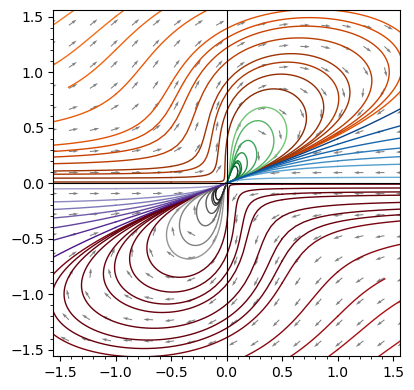

In [341]:
res = res1+res2
res.set_axes_range(-1.8,1.8,-1.8,1.8)
res
combined=res+plot_vector_field(vector([M,N]).normalized(),(x,-1.8,1.8),(y,-1.8,1.8),color=colors.gray.rgb())
combined.set_axes_range(-1.5,1.5,-1.5,1.5)
combined.set_aspect_ratio(1)
combined.save("vinograd.pdf")
combined